In [1]:
# Import all the functions you need
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from pathlib import Path
import platform

# Comment here to add in for either mac or linux computer
if platform.system() == "Linux":   # for linux
    sys.path.extend(['/data/GitHub/NeuroPy']) 
    sys.path.extend(['/data/GitHub/TraceFC/'])
elif platform.system() == "Darwin":
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy'])
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/TraceFC'])
elif platform.system() == "Windows":
    print('No windows repositories defined')

from neuropy import core
from neuropy.io import (optitrackio,
                        dlcio,
                        )
from neuropy.io.neuroscopeio import NeuroscopeIO
from neuropy.io.binarysignalio import BinarysignalIO 
from neuropy.io.miniscopeio import MiniscopeIO
from neuropy.core import Epoch
from neuropy.utils import plot_util
from neuropy.utils.signal_process import WaveletSg
from neuropy.plotting.spikes import plot_raster, plot_binned_raster
from neuropy.plotting.signals import plot_signal_w_epochs, plot_spectrogram
from neuropy.io.usvio import detect_tone

from tracefc.io.session_directory import get_session_dir
import tracefc.io.traceio as traceio

In [2]:
from neuropy.core.session import ProcessData

def sess_use(basepath=os.getcwd()):

    return ProcessData(basepath)

In [3]:
animal, sess_name = 'Finn', 'recall2'
sess_dir = get_session_dir(animal, sess_name)
sess = sess_use(sess_dir)
print(sess.recinfo)

filename: /data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/Finn_recall2_denoised.xml 
# channels: 35
sampling rate: 30000
lfp Srate (downsampled): 1250



In [4]:
print(sess.eegfile)

duration: 4636.13 seconds 
duration: 1.29 hours 



## Read in movement data

In [5]:
import neuropy.io.openephysio as oeio
sync_df = oeio.create_sync_df(sess.basepath)
sync_df["Time since rec start (sec)"] = (sync_df['Datetime'] - sync_df.loc[0, 'Datetime']).dt.total_seconds()
sync_df

start time = 2022-01-22 12:25:22.257986-05:00
start time = 2022-01-22 12:44:08.641035-05:00
start time = 2022-01-22 13:06:32.283185-05:00
start time = 2022-01-22 13:33:03.698817-05:00
start time = 2022-01-22 13:48:09.925495-05:00


,Recording,Datetime,Condition,nframe_dat,dat_time,nframe_eeg,eeg_time,Time since rec start (sec)
0,0,2022-01-22 12:25:22.257986-05:00,start,0,0.000000,0,0.0000,0.000000
1,0,2022-01-22 12:30:49.818486-05:00,stop,9826815,327.560500,409450,327.5600,327.560500
2,1,2022-01-22 12:44:08.641035-05:00,start,9826816,327.560533,409451,327.5608,1126.383049
3,1,2022-01-22 13:04:33.490068333-05:00,stop,46572287,1552.409567,1940511,1552.4088,2351.232082
4,2,2022-01-22 13:06:32.283185-05:00,start,46572288,1552.409600,1940512,1552.4096,2470.025199
5,2,2022-01-22 13:28:36.613818333-05:00,stop,86302207,2876.740233,3595925,2876.7400,3794.355832
6,3,2022-01-22 13:33:03.698817-05:00,start,86302208,2876.740267,3595926,2876.7408,4061.440831
7,3,2022-01-22 13:46:50.732383667-05:00,stop,111113215,3703.773833,4629717,3703.7736,4888.474398
8,4,2022-01-22 13:48:09.925495-05:00,start,111113216,3703.773867,4629718,3703.7744,4967.667509
9,4,2022-01-22 14:03:42.277461667-05:00,stop,139083775,4636.125833,5795157,4636.1256,5900.019476


In [6]:
import neuropy.io.miniscopeio as miniio
mini = miniio.MiniscopeIO(sess.basepath)

In [7]:
mini.load_all_orientation()
mini.load_all_timestamps()

including folder /data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/1_tone_recall/2022_01_22/12_46_12
including folder /data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/2_control_tone_recall/2022_01_22/13_08_29
including folder /data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/2_control_tone_recall/2022_01_22/13_10_16
including folder /data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/2_control_tone_recall/2022_01_22/13_27_48
including folder /data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/3_control_tone_recall_training_tone_arena/Finn/gobears/2022_01_22/13_34_04
including folder /data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/3_control_tone_recall_training_tone_arena/Finn/gobears/2022_01_22/13_40_05
including folder /data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/4_ctx_recall/2022_01_22/13_52_43
Eliminating timestamps from corrupted video0 in 13_08_29 folder.


,Frame Number,Time Stamp (ms),Buffer Index,Timestamps
0,0,-68,0,2022-01-22 12:46:12.651
1,1,1,0,2022-01-22 12:46:12.720
2,2,89,0,2022-01-22 12:46:12.808
3,3,134,0,2022-01-22 12:46:12.853
4,4,201,0,2022-01-22 12:46:12.920
...,...,...,...,...
8918,8918,600847,0,2022-01-22 14:02:44.186
8919,8919,600915,0,2022-01-22 14:02:44.254
8920,8920,600982,0,2022-01-22 14:02:44.321
8921,8921,601050,0,2022-01-22 14:02:44.389


In [8]:
mini.orient_all

,Time Stamp (ms),qw,qx,qy,qz,Timestamps,roll,pitch,yaw
0,-68,0.897095,-0.050903,-0.130371,-0.419128,2022-01-22 12:46:12.651,0.018684,-0.280230,-0.876802
1,1,0.896667,-0.051270,-0.130554,-0.419922,2022-01-22 12:46:12.720,0.018425,-0.280861,-0.878578
2,89,0.896606,-0.050964,-0.130310,-0.420166,2022-01-22 12:46:12.808,0.018850,-0.280148,-0.879130
3,134,0.897034,-0.050415,-0.130493,-0.419189,2022-01-22 12:46:12.853,0.019724,-0.280030,-0.877052
4,201,0.896973,-0.050171,-0.131042,-0.419312,2022-01-22 12:46:12.920,0.020704,-0.280826,-0.877563
...,...,...,...,...,...,...,...,...,...
8918,600847,-0.386902,-0.044617,0.076660,0.917847,2022-01-22 14:02:44.186,0.176204,0.022584,-2.341741
8919,600915,-0.387207,-0.043945,0.077087,0.917725,2022-01-22 14:02:44.254,0.176475,0.020963,-2.341235
8920,600982,-0.388123,-0.043762,0.077515,0.917297,2022-01-22 14:02:44.321,0.177139,0.020117,-2.339256
8921,601050,-0.387939,-0.043945,0.078003,0.917297,2022-01-22 14:02:44.389,0.178177,0.020104,-2.339552


In [9]:
sync_df

,Recording,Datetime,Condition,nframe_dat,dat_time,nframe_eeg,eeg_time,Time since rec start (sec)
0,0,2022-01-22 12:25:22.257986-05:00,start,0,0.000000,0,0.0000,0.000000
1,0,2022-01-22 12:30:49.818486-05:00,stop,9826815,327.560500,409450,327.5600,327.560500
2,1,2022-01-22 12:44:08.641035-05:00,start,9826816,327.560533,409451,327.5608,1126.383049
3,1,2022-01-22 13:04:33.490068333-05:00,stop,46572287,1552.409567,1940511,1552.4088,2351.232082
4,2,2022-01-22 13:06:32.283185-05:00,start,46572288,1552.409600,1940512,1552.4096,2470.025199
5,2,2022-01-22 13:28:36.613818333-05:00,stop,86302207,2876.740233,3595925,2876.7400,3794.355832
6,3,2022-01-22 13:33:03.698817-05:00,start,86302208,2876.740267,3595926,2876.7408,4061.440831
7,3,2022-01-22 13:46:50.732383667-05:00,stop,111113215,3703.773833,4629717,3703.7736,4888.474398
8,4,2022-01-22 13:48:09.925495-05:00,start,111113216,3703.773867,4629718,3703.7744,4967.667509
9,4,2022-01-22 14:03:42.277461667-05:00,stop,139083775,4636.125833,5795157,4636.1256,5900.019476


In [10]:
sync_df["Time since rec start (sec)"] = (sync_df['Datetime'] - sync_df.loc[0, 'Datetime']).dt.total_seconds()
sync_df

,Recording,Datetime,Condition,nframe_dat,dat_time,nframe_eeg,eeg_time,Time since rec start (sec)
0,0,2022-01-22 12:25:22.257986-05:00,start,0,0.000000,0,0.0000,0.000000
1,0,2022-01-22 12:30:49.818486-05:00,stop,9826815,327.560500,409450,327.5600,327.560500
2,1,2022-01-22 12:44:08.641035-05:00,start,9826816,327.560533,409451,327.5608,1126.383049
3,1,2022-01-22 13:04:33.490068333-05:00,stop,46572287,1552.409567,1940511,1552.4088,2351.232082
4,2,2022-01-22 13:06:32.283185-05:00,start,46572288,1552.409600,1940512,1552.4096,2470.025199
5,2,2022-01-22 13:28:36.613818333-05:00,stop,86302207,2876.740233,3595925,2876.7400,3794.355832
6,3,2022-01-22 13:33:03.698817-05:00,start,86302208,2876.740267,3595926,2876.7408,4061.440831
7,3,2022-01-22 13:46:50.732383667-05:00,stop,111113215,3703.773833,4629717,3703.7736,4888.474398
8,4,2022-01-22 13:48:09.925495-05:00,start,111113216,3703.773867,4629718,3703.7744,4967.667509
9,4,2022-01-22 14:03:42.277461667-05:00,stop,139083775,4636.125833,5795157,4636.1256,5900.019476


In [11]:
sess.filePrefix

PosixPath('/data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/Finn_recall2_denoised')

In [12]:
### Bowen copy to properly interpolate

rough_headsensor_times = (mini.orient_all["Timestamps"].dt.tz_localize(tz="America/Detroit") - sync_df.loc[0, "Datetime"]).dt.total_seconds()
mini.orient_all["Time from OE start"] = rough_headsensor_times
mini.orient_all

# Key line of code - converts miniscope time (which doesn't account for disconnects) to eeg time (which cuts out disconnect times)
mini.orient_all["Rough eeg time (s)"] = np.interp(mini.orient_all["Time from OE start"], sync_df["Time since rec start (sec)"], 
                                            sync_df["eeg_time"])
mini.orient_all

,Time Stamp (ms),qw,qx,qy,qz,Timestamps,roll,pitch,yaw,Time from OE start,Rough eeg time (s)
0,-68,0.897095,-0.050903,-0.130371,-0.419128,2022-01-22 12:46:12.651,0.018684,-0.280230,-0.876802,1250.393014,451.570660
1,1,0.896667,-0.051270,-0.130554,-0.419922,2022-01-22 12:46:12.720,0.018425,-0.280861,-0.878578,1250.462014,451.639660
2,89,0.896606,-0.050964,-0.130310,-0.420166,2022-01-22 12:46:12.808,0.018850,-0.280148,-0.879130,1250.550014,451.727660
3,134,0.897034,-0.050415,-0.130493,-0.419189,2022-01-22 12:46:12.853,0.019724,-0.280030,-0.877052,1250.595014,451.772660
4,201,0.896973,-0.050171,-0.131042,-0.419312,2022-01-22 12:46:12.920,0.020704,-0.280826,-0.877563,1250.662014,451.839660
...,...,...,...,...,...,...,...,...,...,...,...
8918,600847,-0.386902,-0.044617,0.076660,0.917847,2022-01-22 14:02:44.186,0.176204,0.022584,-2.341741,5841.928014,4578.034186
8919,600915,-0.387207,-0.043945,0.077087,0.917725,2022-01-22 14:02:44.254,0.176475,0.020963,-2.341235,5841.996014,4578.102186
8920,600982,-0.388123,-0.043762,0.077515,0.917297,2022-01-22 14:02:44.321,0.177139,0.020117,-2.339256,5842.063014,4578.169186
8921,601050,-0.387939,-0.043945,0.078003,0.917297,2022-01-22 14:02:44.389,0.178177,0.020104,-2.339552,5842.131014,4578.237186


In [13]:
cs_epochs_file = sess.filePrefix.with_suffix(".cs_epochs.npy")
sess.cs_epochs = Epoch(epochs=None, file=cs_epochs_file)
sess.cs_epochs.starts

array([ 511.975465,  585.907765,  650.887065,  723.837931,  786.766598,
        856.717565,  928.667398,  992.597165, 1063.549131, 1127.496431,
       1188.426731, 1261.378231, 1341.329198, 1410.257665, 1472.206965])

In [14]:
csn_epochs_file = sess.filePrefix.with_suffix(".csn_epochs.npy")
sess.csn_epochs = Epoch(epochs=None, file=csn_epochs_file)
sess.csn_epochs.starts

array([1850.576715, 1913.505981, 1993.457915, 2055.405281, 2121.335848,
       2183.285715, 2253.236981, 2333.167815, 2395.125081, 2464.076248,
       2544.007981, 2616.957548, 3368.225683, 3443.153183, 3504.101316,
       3569.052083, 3643.982916])

In [15]:
cs2_epochs_file = sess.filePrefix.with_suffix(".cs2_epochs.npy")
sess.cs2_epochs = Epoch(epochs=None, file=cs2_epochs_file)
sess.cs2_epochs.starts

array([2677.905681, 2738.835548, 2799.786048])

In [16]:
1725-1656

69

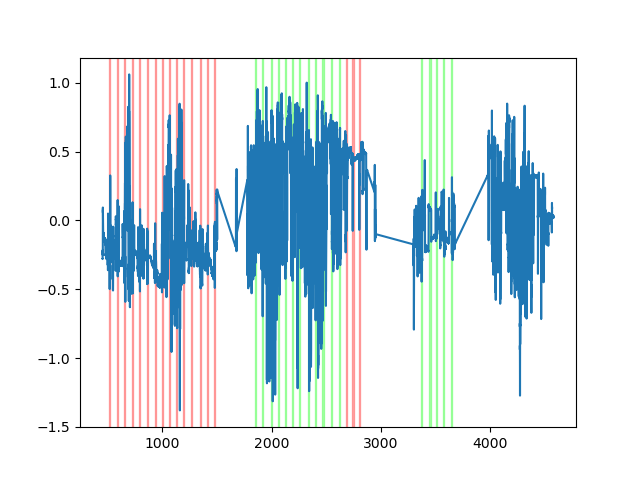

In [17]:
%matplotlib widget
_, ax = plt.subplots()
ax.plot(mini.orient_all["Rough eeg time (s)"], mini.orient_all.pitch)
for start, stop in zip(sess.cs_epochs.starts, sess.cs_epochs.stops):
    ax.axvspan(start, stop, color=[1, 0, 0, 0.3])

for start, stop in zip(sess.csn_epochs.starts, sess.csn_epochs.stops):
    ax.axvspan(start, stop, color=[0, 1, 0, 0.3])

for start, stop in zip(sess.cs2_epochs.starts, sess.cs2_epochs.stops):
    ax.axvspan(start, stop, color=[1, 0, 0, 0.3])

In [18]:
def calc_head_speed(df):

    angle_diffs = []
    for ang_axis in ["roll", "pitch", "yaw"]:
        axis_diff = df[ang_axis].diff()

        # Correct any swings of > 2*pi
        axis_diff[axis_diff > 1.8 * np.pi] = axis_diff[axis_diff > 1.8 * np.pi] - 2 * np.pi
        axis_diff[axis_diff < -1.8 * np.pi] = axis_diff[axis_diff < -1.8 * np.pi] + 2 * np.pi
        angle_diffs.append(axis_diff.values)
    # head_speed = np.sqrt(np.square(df.roll.diff()) + np.square(df.pitch.diff()) + np.square(df.yaw.diff())) / df["Rough eeg time (s)"].diff()
    head_speed = np.sqrt(np.square(angle_diffs[0]) + np.square(angle_diffs[1]) + np.square(angle_diffs[2]))
    return head_speed
calc_head_speed(mini.orient_all)

array([       nan, 0.00190247, 0.00099692, ..., 0.00225154, 0.00107963,
       0.001725  ])

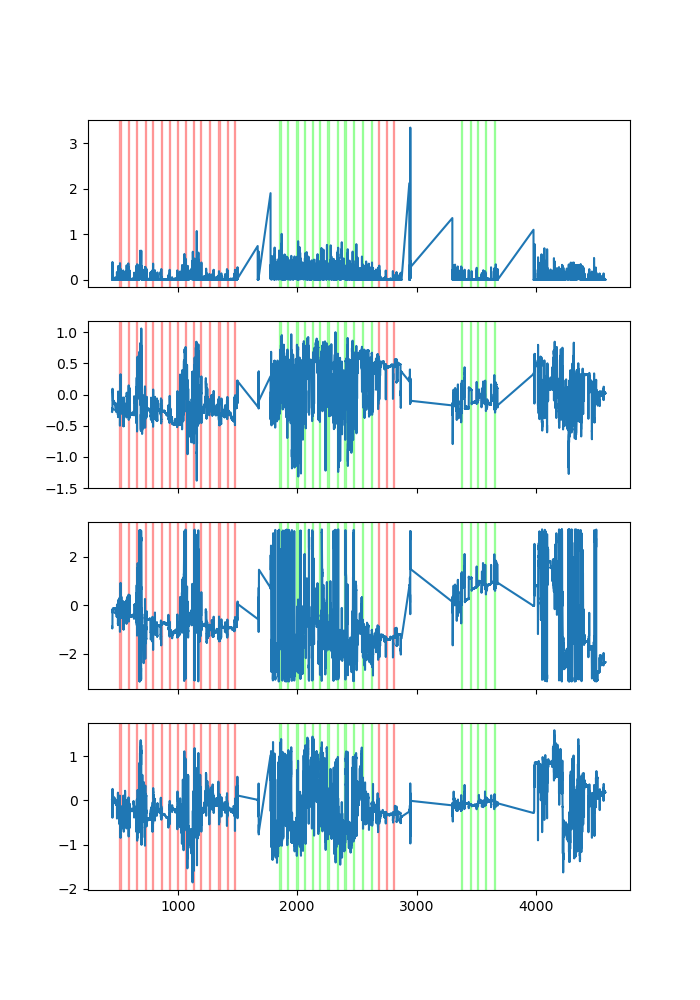

In [19]:
%matplotlib widget
_, axs = plt.subplots(4, 1, figsize=(7, 10), sharex=True)
ax = axs[0]
mini.orient_all["Head speed"] = calc_head_speed(mini.orient_all)
ax.plot(mini.orient_all["Rough eeg time (s)"], mini.orient_all["Head speed"])
for start, stop in zip(sess.cs_epochs.starts, sess.cs_epochs.stops):
    ax.axvspan(start, stop, color=[1, 0, 0, 0.3])

for start, stop in zip(sess.csn_epochs.starts, sess.csn_epochs.stops):
    ax.axvspan(start, stop, color=[0, 1, 0, 0.3])

for start, stop in zip(sess.cs2_epochs.starts, sess.cs2_epochs.stops):
    ax.axvspan(start, stop, color=[1, 0, 0, 0.3])

ax = axs[1]
ax.plot(mini.orient_all["Rough eeg time (s)"], mini.orient_all.pitch)
for start, stop in zip(sess.cs_epochs.starts, sess.cs_epochs.stops):
    ax.axvspan(start, stop, color=[1, 0, 0, 0.3])

for start, stop in zip(sess.csn_epochs.starts, sess.csn_epochs.stops):
    ax.axvspan(start, stop, color=[0, 1, 0, 0.3])

for start, stop in zip(sess.cs2_epochs.starts, sess.cs2_epochs.stops):
    ax.axvspan(start, stop, color=[1, 0, 0, 0.3])

ax = axs[2]
ax.plot(mini.orient_all["Rough eeg time (s)"], mini.orient_all.yaw)
for start, stop in zip(sess.cs_epochs.starts, sess.cs_epochs.stops):
    ax.axvspan(start, stop, color=[1, 0, 0, 0.3])

for start, stop in zip(sess.csn_epochs.starts, sess.csn_epochs.stops):
    ax.axvspan(start, stop, color=[0, 1, 0, 0.3])

for start, stop in zip(sess.cs2_epochs.starts, sess.cs2_epochs.stops):
    ax.axvspan(start, stop, color=[1, 0, 0, 0.3])

ax = axs[3]
ax.plot(mini.orient_all["Rough eeg time (s)"], mini.orient_all.roll)
for start, stop in zip(sess.cs_epochs.starts, sess.cs_epochs.stops):
    ax.axvspan(start, stop, color=[1, 0, 0, 0.3])

for start, stop in zip(sess.csn_epochs.starts, sess.csn_epochs.stops):
    ax.axvspan(start, stop, color=[0, 1, 0, 0.3])

for start, stop in zip(sess.cs2_epochs.starts, sess.cs2_epochs.stops):
    ax.axvspan(start, stop, color=[1, 0, 0, 0.3])

In [20]:
from neuropy.analyses.artifact import detect_artifact_epochs
signal = sess.eegfile.get_signal()
from neuropy.analyses.artifact import detect_artifact_epochs
signal = sess.eegfile.get_signal()
buffer_add = 0.25  # seconds, None = don't add

art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
if art_epochs_file.exists():
    art_epochs = Epoch(epochs=None, file=art_epochs_file)
    print('Existing artifact epochs file loaded')
else:
    # art_epochs = detect_artifact_epochs(signal, thresh=8, 
    #                                 edge_cutoff=3, merge=6)

    # Pick a particular channel with the code below
    art_epochs = detect_artifact_epochs(signal.time_slice(channel_id=31), thresh=11, 
                                    edge_cutoff=3, merge=6)

    if buffer_add is not None:  # Add in buffer to prevent erroneous detection of start/stop of artifact as SWRs
        art_epochs.add_epoch_buffer(buffer_add)
    sess.recinfo.write_epochs(epochs=art_epochs, ext='art')
    art_epochs.save(art_epochs_file)

print(f'Total artifact time = {art_epochs.durations.sum():0.1F} seconds')
art_epochs.to_dataframe()


from neuropy.analyses.oscillations import detect_theta_epochs
mindur=1
maxdur=20
thresh = (1, None)
sigma = 0.125
edge_cutoff = 0.25
theta_channel = 24

# use this if you don't know theta channel
if theta_channel is None:
    theta_epochs, theta_power = detect_theta_epochs(signal, prbgrp, mindur=mindur, maxdur=maxdur, thresh=thresh, 
                                                    edge_cutoff=edge_cutoff, ignore_epochs=art_epochs, return_power=True)
else:
    signal_use = signal.time_slice(channel_id=theta_channel)
    theta_epochs, theta_power = detect_theta_epochs(signal_use, probegroup=None, mindur=mindur, maxdur=maxdur, thresh=thresh, 
                                                    edge_cutoff=edge_cutoff, ignore_epochs=art_epochs, return_power=True)

/home/bowenw/miniforge3/envs/NeuroPy/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Existing artifact epochs file loaded
Total artifact time = 145.7 seconds
Best channel for theta: [24]
357 epochs remaining with durations within (1,20)


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(5…

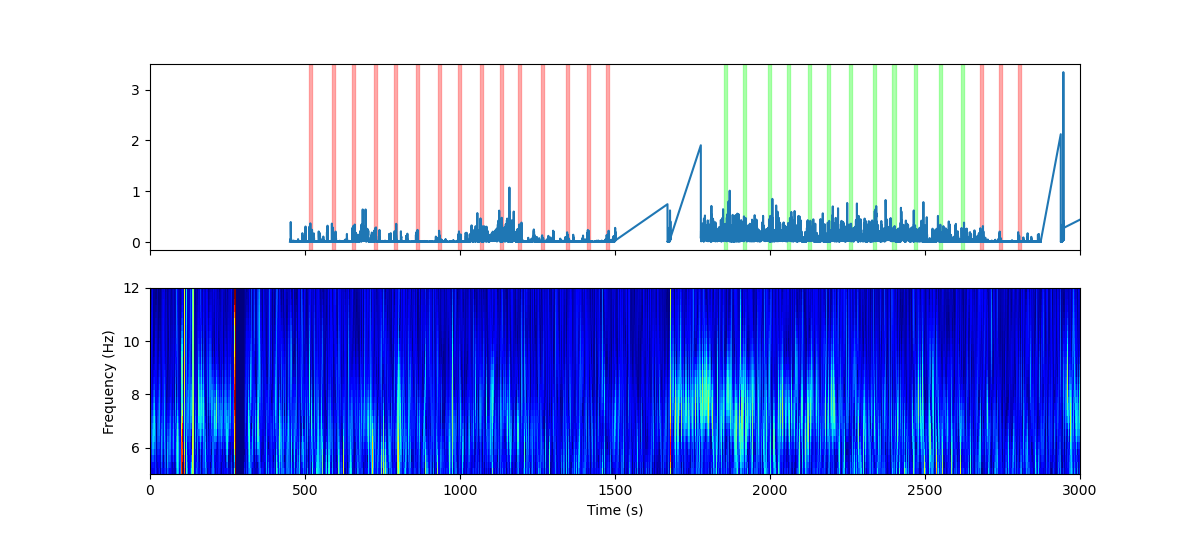

In [21]:
# Run wavelet on theta range
theta_range = np.arange(4, 14, 0.25)  # How do I select these? 0.25Hz seems good to start
wv_theta = WaveletSg(signal.time_slice(channel_id=theta_channel, t_stop=np.min((80*60, signal.t_stop))), freqs=theta_range, sigma=None)
import matplotlib.pyplot as plt

_, axs = plt.subplots(2, 1, figsize=(12,5.333), sharex=True)
time_to_plot = [0, 3000]
theta_freq_lims = [5, 12]

ax1 = axs[0]
mini.orient_all["Head speed"] = calc_head_speed(mini.orient_all)
ax1.plot(mini.orient_all["Rough eeg time (s)"], mini.orient_all["Head speed"])
for start, stop in zip(sess.cs_epochs.starts, sess.cs_epochs.stops):
    ax1.axvspan(start, stop, color=[1, 0, 0, 0.3])
for start, stop in zip(sess.csn_epochs.starts, sess.csn_epochs.stops):
    ax1.axvspan(start, stop, color=[0, 1, 0, 0.3])
for start, stop in zip(sess.cs2_epochs.starts, sess.cs2_epochs.stops):
    ax1.axvspan(start, stop, color=[1, 0, 0, 0.3])


ax2 = axs[1]
plot_spectrogram(wv_theta, time_lims=time_to_plot, freq_lims=theta_freq_lims, ax=ax2)

plt.show()

/tmp/ipykernel_2423402/4254188071.py:32: RuntimeWarning: Mean of empty slice
  average_speed = np.nanmean(all_speeds_cs_plus, axis=0)


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(5…

/tmp/ipykernel_2423402/4254188071.py:63: RuntimeWarning: Mean of empty slice
  average_speed = np.nanmean(all_speeds_cs_minus, axis=0)


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(5…

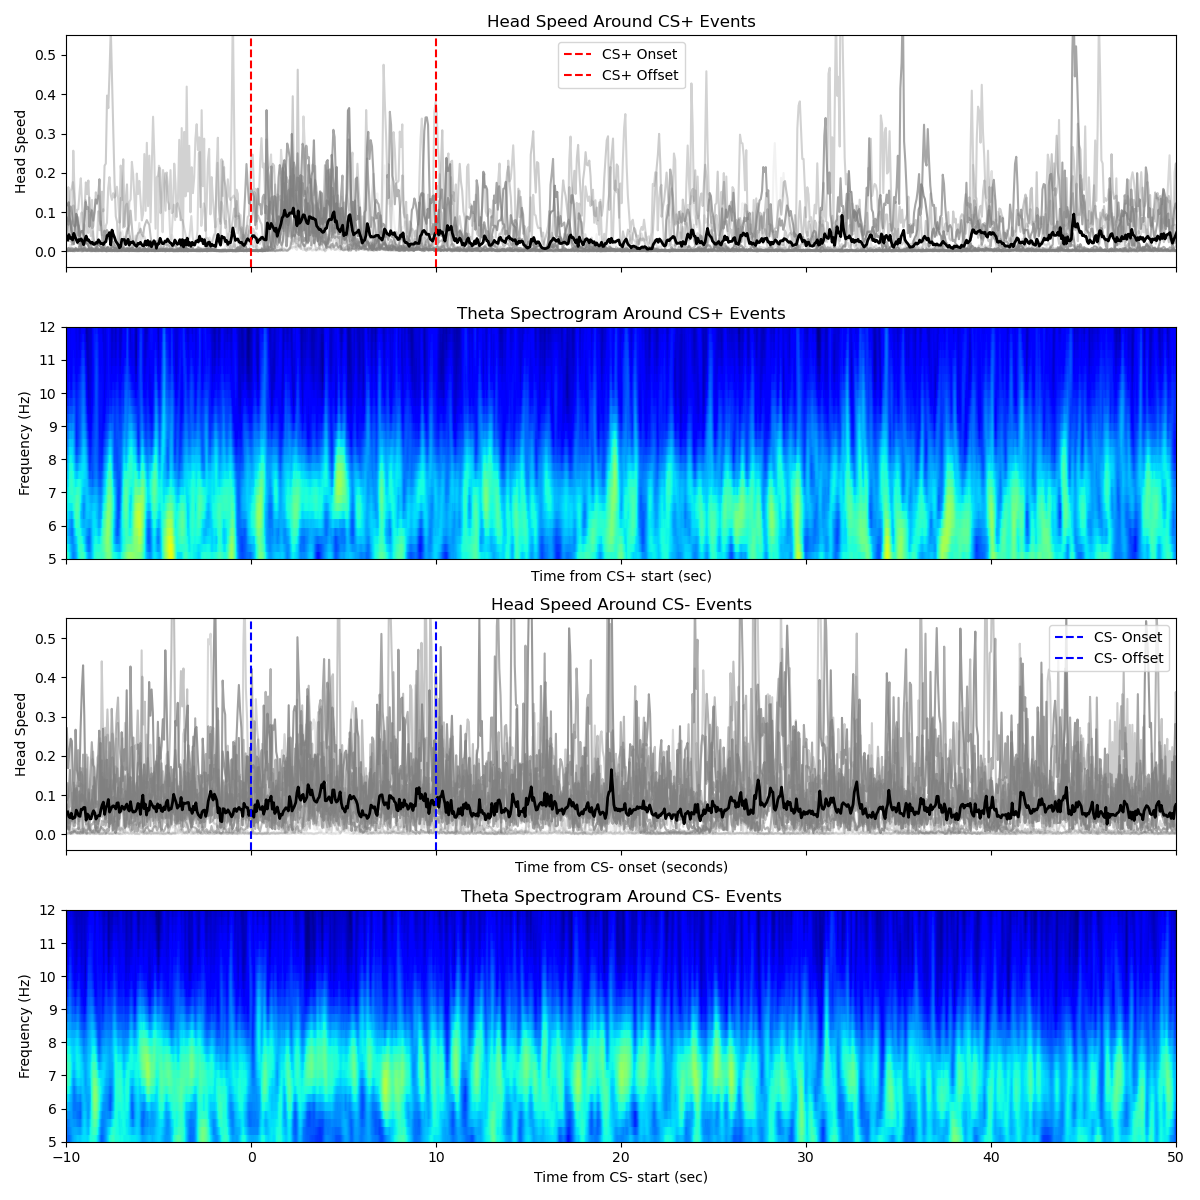

In [40]:
import matplotlib.pyplot as plt
import numpy as np

sampling_rate = 30
theta_freq_lims = [5, 12]  
usv_buffer_sec = (10, 50)  

fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Setup common variables
start_buffer = 10
stop_buffer = 50
mini_sr = 15  # fps

# Head Speed for CS+ in the first subplot
ax1 = axs[0]
epochs_use = sess.cs_epochs
eeg_times = mini.orient_all["Rough eeg time (s)"]
tinterp = np.arange(-start_buffer, (10 + stop_buffer) + 1/mini_sr, 1/mini_sr)
all_speeds_cs_plus = np.ones((epochs_use.n_epochs, len(tinterp)))*np.nan

for idt, (start, stop) in enumerate(zip(epochs_use.starts, epochs_use.stops)):
    trial_bool = (eeg_times > (start - start_buffer)) & (eeg_times < (stop + stop_buffer))
    speeds = mini.orient_all.loc[trial_bool, "Head speed"].values
    times = mini.orient_all.loc[trial_bool, "Rough eeg time (s)"].values - start

    adjusted_alpha = max(0.8 - idt*0.05, 0.1)  # Prevent alpha from going negative
    ax1.plot(times, speeds, color='grey', alpha=adjusted_alpha)
    data_bin_id = np.digitize(times, tinterp)
    all_speeds_cs_plus[idt, data_bin_id] = speeds

average_speed = np.nanmean(all_speeds_cs_plus, axis=0)
ax1.plot(tinterp, average_speed, color='black', linewidth=2)
ax1.axvline(x=0, color='red', linestyle='--', label='CS+ Onset')
ax1.axvline(x=10, color='red', linestyle='--', label='CS+ Offset')
ax1.set_ylabel('Head Speed')
ax1.set_title('Head Speed Around CS+ Events')
ax1.legend()
ax1.set_ylim(bottom=-0.04, top=0.55)

# Theta Power Spectrogram for CS+ in the second subplot
ax2 = axs[1]
wv_theta_mean_cs = wv_theta.get_pe_mean_spec(sess.cs_epochs.starts, buffer_sec=usv_buffer_sec, ignore_epochs=art_epochs, print_ignored_frames=False)
plot_spectrogram(wv_theta_mean_cs, np.multiply(usv_buffer_sec, (-1, 1)), theta_freq_lims, ax2)
ax2.set_xlabel('Time from CS+ start (sec)')
ax2.set_title('Theta Spectrogram Around CS+ Events')

# Head Speed for CS- in the third subplot
ax3 = axs[2]
epochs_use = sess.csn_epochs
all_speeds_cs_minus = np.ones((epochs_use.n_epochs, len(tinterp)))*np.nan

for idt, (start, stop) in enumerate(zip(epochs_use.starts, epochs_use.stops)):
    trial_bool = (eeg_times > (start - start_buffer)) & (eeg_times < (stop + stop_buffer))
    speeds = mini.orient_all.loc[trial_bool, "Head speed"].values
    times = mini.orient_all.loc[trial_bool, "Rough eeg time (s)"].values - start

    adjusted_alpha = max(0.8 - idt*0.05, 0.1)  # Prevent alpha from going negative
    ax3.plot(times, speeds, color='grey', alpha=adjusted_alpha)
    data_bin_id = np.digitize(times, tinterp)
    all_speeds_cs_minus[idt, data_bin_id] = speeds

average_speed = np.nanmean(all_speeds_cs_minus, axis=0)
ax3.plot(tinterp, average_speed, color='black', linewidth=2)
ax3.axvline(x=0, color='blue', linestyle='--', label='CS- Onset')
ax3.axvline(x=10, color='blue', linestyle='--', label='CS- Offset')
ax3.set_xlabel('Time from CS- onset (seconds)')
ax3.set_ylabel('Head Speed')
ax3.set_title('Head Speed Around CS- Events')
ax3.legend()
ax3.set_ylim(bottom=-0.04, top=0.55)

# Theta Power Spectrogram for CS- in the fourth subplot
ax4 = axs[3]
wv_theta_mean_csn = wv_theta.get_pe_mean_spec(sess.csn_epochs.starts, buffer_sec=usv_buffer_sec, ignore_epochs=art_epochs, print_ignored_frames=False)
plot_spectrogram(wv_theta_mean_csn, np.multiply(usv_buffer_sec, (-1, 1)), theta_freq_lims, ax4)
ax4.set_xlabel('Time from CS- start (sec)')
ax4.set_title('Theta Spectrogram Around CS- Events')

plt.tight_layout()
plt.show()

## Save notebook to animal working directory

In [22]:
from neuropy.utils.manipulate_files import save_notebook
try:
    save_notebook(sess.basepath, save_prepend=f"{animal}_{sess_name}_")
except PermissionError:
    print('Got a weird PermissionError. Check to make sure file saved successfully')

/data/GitHub/TraceFC/Notebooks/Animal_files/Recall2 Notebooks/Rec2-Sync_USV_and_Ephys_archive(Finn).ipynb saved to /data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/Finn_recall2_Rec2-Sync_USV_and_Ephys_archive(Finn).ipynb


### Load in disconnect and motion artifacts

In [23]:
from neuropy.analyses.artifact import detect_artifact_epochs
signal = sess.eegfile.get_signal()
buffer_add = 0.25  # seconds, None = don't add

art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
if art_epochs_file.exists():
    art_epochs = Epoch(epochs=None, file=art_epochs_file)
    print('Existing artifact epochs file loaded')
else:
    # art_epochs = detect_artifact_epochs(signal, thresh=8, 
    #                                 edge_cutoff=3, merge=6)

    # Pick a particular channel with the code below
    art_epochs = detect_artifact_epochs(signal.time_slice(channel_id=31), thresh=11, 
                                    edge_cutoff=3, merge=6)

    if buffer_add is not None:  # Add in buffer to prevent erroneous detection of start/stop of artifact as SWRs
        art_epochs.add_epoch_buffer(buffer_add)
    sess.recinfo.write_epochs(epochs=art_epochs, ext='art')
    art_epochs.save(art_epochs_file)

print(f'Total artifact time = {art_epochs.durations.sum():0.1F} seconds')
art_epochs.to_dataframe()

Existing artifact epochs file loaded
Total artifact time = 145.7 seconds


,start,stop,label,duration
0,99.2996,123.8522,None,24.5526
1,130.7932,140.5244,None,9.7312
2,156.8254,157.2542,None,0.4288
3,161.3270,163.7142,None,2.3872
4,201.0580,201.5764,None,0.5184
5,208.2372,210.5356,None,2.2984
6,226.1516,226.6636,None,0.5120
7,269.7514,306.1768,None,36.4254
8,318.3456,319.7728,None,1.4272
9,323.3544,324.9344,None,1.5800


<Axes: >

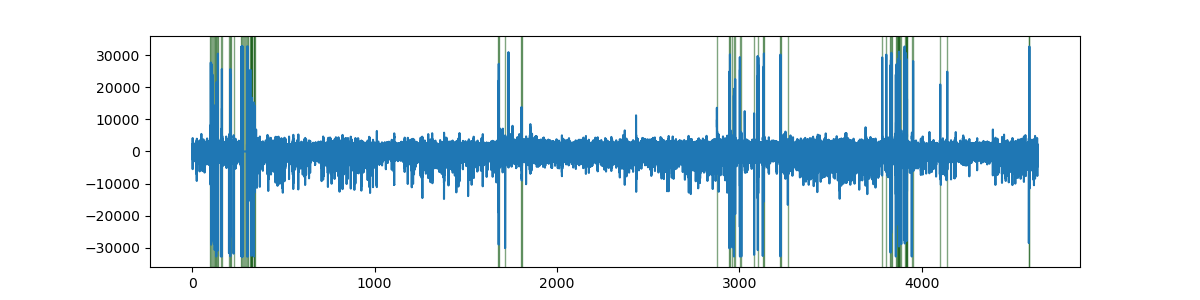

In [24]:
%matplotlib widget

chan_plot = 28
plot_signal_w_epochs(signal, 28, art_epochs)

## Define probe group

/data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/Finn_recall2_denoised.probegroup.npy saved


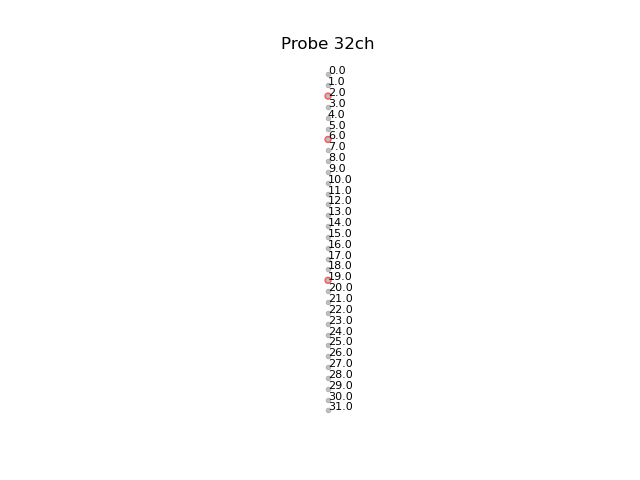

In [25]:
from neuropy.core import Shank, Probe, ProbeGroup
from neuropy.plotting import plot_probe
shank = Shank()
shank = shank.auto_generate(columns=1, contacts_per_column=32, xpitch=0,
                   ypitch=20, channel_id=np.arange(31, -1, -1))
shank.set_disconnected_channels(sess.recinfo.skipped_channels)
probe = Probe(shank)
prbgrp = ProbeGroup()
prbgrp.add_probe(probe)
plot_probe(prbgrp)
prbgrp.filename = sess.filePrefix.with_suffix(".probegroup.npy")
prbgrp.save(prbgrp.filename)
sess.prbgrp = prbgrp

## Detect Theta epochs

In [26]:
from neuropy.analyses.oscillations import detect_theta_epochs
mindur=1
maxdur=20
thresh = (1, None)
sigma = 0.125
edge_cutoff = 0.25
theta_channel = 24
# use this if you don't know theta channel
if theta_channel is None:
    theta_epochs, theta_power = detect_theta_epochs(signal, prbgrp, mindur=mindur, maxdur=maxdur, thresh=thresh, 
                                                    edge_cutoff=edge_cutoff, ignore_epochs=art_epochs, return_power=True)
else:
    signal_use = signal.time_slice(channel_id=theta_channel)
    theta_epochs, theta_power = detect_theta_epochs(signal_use, probegroup=None, mindur=mindur, maxdur=maxdur, thresh=thresh, 
                                                    edge_cutoff=edge_cutoff, ignore_epochs=art_epochs, return_power=True)

Best channel for theta: [24]
357 epochs remaining with durations within (1,20)


## Detect SWR Epochs

In [27]:
from neuropy.analyses.oscillations import detect_ripple_epochs
ripple_channel = 24
thresh = (2, None)  # conservative but good
edge_cutoff = 0.5
ripple_epochs = detect_ripple_epochs(signal, prbgrp, thresh=thresh, ripple_channel=ripple_channel, 
                                     ignore_epochs=art_epochs)


Selected channels for ripples: [24]
1472 epochs remaining with durations within (0.05,0.45)


## Detect Delta

In [28]:
#Detect Delta
from neuropy.analyses.oscillations import detect_hpc_delta_wave_epochs
min_dur = 0.15  
max_dur = 0.5   
ignore_epochs = None  
delta_channel = 24  

freq_band = (0.5, 4)

if delta_channel is not None:
    signal_use = signal.time_slice(channel_id=delta_channel)
else:
    signal_use = signal
delta_epochs = detect_hpc_delta_wave_epochs(
    signal_use, freq_band=freq_band, min_dur=min_dur, max_dur=max_dur, ignore_epochs=ignore_epochs
)

288 delta waves detected


In [29]:
#Detect Beta
from neuropy.analyses.oscillations import detect_beta_epochs
mindur=1
maxdur=20
thresh = (1, None)
sigma = 0.125
edge_cutoff = 0.25
beta_channel = 24
  
if beta_channel is None:
    beta_epochs, beta_power = detect_beta_epochs(signal, prbgrp, mindur=mindur, maxdur=maxdur, thresh=thresh, 
                                                    edge_cutoff=edge_cutoff, ignore_epochs=art_epochs, return_power=True)
else:
    signal_use = signal.time_slice(channel_id=beta_channel)
    beta_epochs, beta_power = detect_beta_epochs(signal_use, probegroup=None, mindur=mindur, maxdur=maxdur, thresh=thresh, 
                                                    edge_cutoff=edge_cutoff, ignore_epochs=art_epochs, return_power=True)

Best channel for beta: [24]
366 epochs remaining with durations within (1,20)


In [30]:
# Detect Gamma
from neuropy.analyses.oscillations import detect_gamma_epochs
from neuropy.analyses.oscillations import Gamma
band=(40, 80)
lowthresh = 1.5  
highthresh = 3 
minDistance = 300
minDuration = 125
gamma_channel = 24

# Use this if you don't know the specific channel for gamma detection
if gamma_channel is None:
    signal_use = signal.time_slice(channel_id=gamma_channel)
else:
    # If a specific channel for gamma is known
    signal_use = signal

gammadetect = Gamma()
# gammadetect.get_peak_intervals(signal.traces, lowthresh=lowthresh, highthresh=highthresh, minDistance=minDistance, minDuration=minDuration)
peakevents, gamma_amp = Gamma().get_peak_intervals(signal_use.traces[gamma_channel, :], band=band, lowthresh=lowthresh, highthresh=highthresh, 
                                        minDistance=minDistance, minDuration=minDuration, return_amplitude=True)
# csd=csd(self, period, refchan, band=band, window=1250)
gamma_epochs = Epoch(pd.DataFrame({"start" : peakevents[:, 0]/sess.eegfile.sampling_rate, "stop": peakevents[:, 1]/sess.eegfile.sampling_rate,
                   "label": ""}))
# pd.DataFrame(dict(start=peakevents[:, 0]/sess.eegfile.sampling_rate, stop=peakevents[:, 1]/sess.eegfile.sampling_rate))

## Sync via CS+ or CS- times in tone_recall or control_tone_recall or tone_habituation session

,channel_states,timestamps,datetimes,event_name
0,-2,849444,2022-01-22 12:25:50.314800000,
906,2,5551671,2022-01-22 12:47:13.055700000,
1054,-2,5849302,2022-01-22 12:47:22.976733333,
2005,2,7769640,2022-01-22 12:48:26.988000000,
2153,-2,8067819,2022-01-22 12:48:36.927300000,


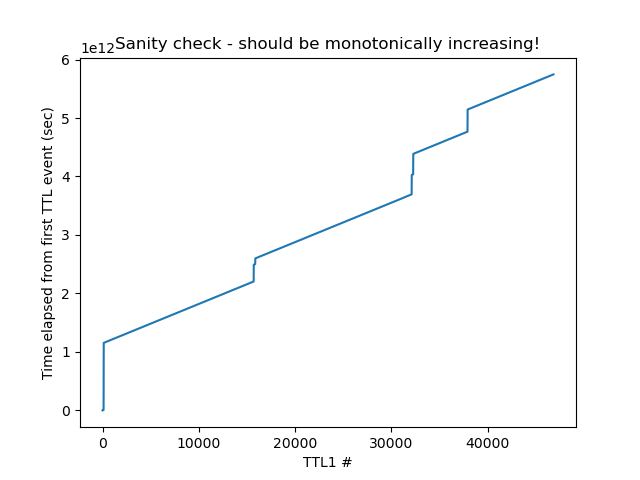

In [31]:
import neuropy.io.openephysio as oeio

# Import TTLs for CS from OpenEphys
ttl_df = oeio.load_all_ttl_events(sess.basepath, sanity_check_channel=1, zero_timestamps=True)
ttl_df[ttl_df['channel_states'].abs() == 2].head(5)

In [32]:
import tracefc.io.traceio as traceio

if "training" in str(sess.basepath):
    # For tone habituation
    csn_starts, csn_stops, csn_df = traceio.load_trace_events(sess.basepath, session_type="tone_habituation", 
                                                          event_type="CS-", return_df=True)
    print(f'{csn_starts.shape[0]} CS- events detected')
    print(csn_starts.head(6))
    
    # For CS+ during training
    cs_starts, cs_stops, cs_df = traceio.load_trace_events(sess.basepath, session_type="training", 
                                                          event_type="CS+", return_df=True)
    print(f'{cs_starts.shape[0]} CS+ events detected')
    print(cs_starts.head(6))
elif "recall" in str(sess.basepath):
    # For tone recall CS+
    cs_starts, cs_stops, cs_df = traceio.load_trace_events(sess.basepath, session_type="tone_recall", 
                                                          event_type="CS+", return_df=True)
    print(f'{cs_starts.shape[0]} CS+ events detected')
    print(cs_starts.head(6))
    
    # For control tone recall CS-
    csn_starts, csn_stops, csn_df = traceio.load_trace_events(sess.basepath, session_type="control_tone_recall", 
                                                          event_type="CS-", return_df=True)
    print(f'{csn_starts.shape[0]} CS- events detected')
    print(csn_starts.head(6))

15 CS+ events detected
      Time (s)      Event                     Timestamp
13   61.003838  CS1_start 2022-01-22 12:47:13.691847062
15  134.935588  CS2_start 2022-01-22 12:48:27.623596883
17  199.884599  CS3_start 2022-01-22 12:49:32.572607970
19  272.865102  CS4_start 2022-01-22 12:50:45.553110576
21  335.793413  CS5_start 2022-01-22 12:51:48.481422401
23  405.744088  CS6_start 2022-01-22 12:52:58.432096934
18 CS- events detected
      Time (s)      Event                     Timestamp
9    60.845767  CS1_start 2022-01-22 13:11:30.724150783
11  123.774616  CS2_start 2022-01-22 13:12:33.653000480
13  203.726303  CS3_start 2022-01-22 13:13:53.604687339
15  265.673500  CS4_start 2022-01-22 13:14:55.551883584
17  331.603791  CS5_start 2022-01-22 13:16:01.482175475
19  393.553503  CS6_start 2022-01-22 13:17:03.431886798


In [33]:
sync_df = oeio.create_sync_df(sess.basepath)
sync_df

start time = 2022-01-22 12:25:22.257986-05:00
start time = 2022-01-22 12:44:08.641035-05:00
start time = 2022-01-22 13:06:32.283185-05:00
start time = 2022-01-22 13:33:03.698817-05:00
start time = 2022-01-22 13:48:09.925495-05:00


,Recording,Datetime,Condition,nframe_dat,dat_time,nframe_eeg,eeg_time
0,0,2022-01-22 12:25:22.257986-05:00,start,0,0.000000,0,0.0000
1,0,2022-01-22 12:30:49.818486-05:00,stop,9826815,327.560500,409450,327.5600
2,1,2022-01-22 12:44:08.641035-05:00,start,9826816,327.560533,409451,327.5608
3,1,2022-01-22 13:04:33.490068333-05:00,stop,46572287,1552.409567,1940511,1552.4088
4,2,2022-01-22 13:06:32.283185-05:00,start,46572288,1552.409600,1940512,1552.4096
5,2,2022-01-22 13:28:36.613818333-05:00,stop,86302207,2876.740233,3595925,2876.7400
6,3,2022-01-22 13:33:03.698817-05:00,start,86302208,2876.740267,3595926,2876.7408
7,3,2022-01-22 13:46:50.732383667-05:00,stop,111113215,3703.773833,4629717,3703.7736
8,4,2022-01-22 13:48:09.925495-05:00,start,111113216,3703.773867,4629718,3703.7744
9,4,2022-01-22 14:03:42.277461667-05:00,stop,139083775,4636.125833,5795157,4636.1256


In [34]:
# Grab CS times corresponding to OE timestamps
ttl_lag_use = pd.Timedelta(0.8, unit="seconds")
cs_oe_start_df = traceio.trace_ttl_to_openephys(cs_starts, 
                                  ttl_df[ttl_df['channel_states'].abs() == 2], 
                                  ttl_lag=ttl_lag_use)
cs_oe_stop_df = traceio.trace_ttl_to_openephys(cs_stops, 
                                  ttl_df[ttl_df['channel_states'].abs() == 2], 
                                  ttl_lag=ttl_lag_use)
# Convert to times in combined eeg file
cs_starts_combined = oeio.recording_events_to_combined_time(cs_oe_start_df, sync_df)
cs_stops_combined = oeio.recording_events_to_combined_time(cs_oe_stop_df, sync_df)

csn_oe_start_df = traceio.trace_ttl_to_openephys(csn_starts, 
                                  ttl_df[ttl_df['channel_states'].abs() == 2], 
                                  ttl_lag=ttl_lag_use*2)
csn_oe_stop_df = traceio.trace_ttl_to_openephys(csn_stops, 
                                  ttl_df[ttl_df['channel_states'].abs() == 2], 
                                  ttl_lag=ttl_lag_use*2)

# Convert to times in combined eeg file
csn_starts_combined = oeio.recording_events_to_combined_time(csn_oe_start_df, sync_df)
csn_stops_combined = oeio.recording_events_to_combined_time(csn_oe_stop_df, sync_df)

start time lag: mean = -0.6316320616, std = 0.007416420918518176
start time lag: mean = -0.6347621056666667, std = 0.001392301181284299
start time lag: mean = -0.39942909682352945, std = 0.20324386711252984
start time lag: mean = -0.4007463578823529, std = 0.20310727458204422


/data/GitHub/TraceFC/tracefc/io/traceio.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace_cs_sync_df.loc[:, "datetimes"] = trace_cs_sync_df["datetimes"].dt.tz_localize(


# Bowen copy below to save CS epoch files!

In [35]:
cs_epochs = Epoch(pd.DataFrame({"start": cs_starts_combined, "stop": cs_stops_combined, "label": "CS+"}))
cs_epochs.save(sess.filePrefix.with_suffix(".csp_epochs.npy"))

/data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/Finn_recall2_denoised.csp_epochs.npy saved


### How to write CS+ to neuroscope event file

In [36]:
cs_tone_recall_epochs = Epoch({"start": cs_starts_combined, "stop": cs_stops_combined, "label": ["CS+"]*len(cs_starts_combined)})
cs_tone_recall_epochs
sess.recinfo.write_epochs(cs_tone_recall_epochs, "cs+")

In [37]:
cs_tone_recall_epochs

15 epochs
Snippet: 
         start        stop label
0  511.975465  521.896498   CS+
1  585.907765  595.847065   CS+
2  650.887065  660.826598   CS+
3  723.837931  733.756865   CS+
4  786.766598  796.706698   CS+

/data2/Trace_FC/Recording_Rats/Finn/2022_01_22_recall2/1_tone_recall/new_arena/T0000001.WAV


IndexError: index 1 is out of bounds for axis 0 with size 1

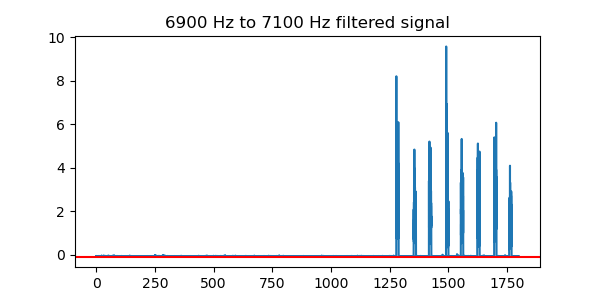

In [38]:
# Detect CS+ in audio recording.
tone_recall_wav = sorted((sess.basepath / "1_tone_recall").glob("**/*.WAV"))[0]
print(tone_recall_wav)

# Get CS+ times and plot to check
cs_wav_epochs = detect_tone(tone_recall_wav, freq_lims=(6900, 7100), thresh=-0.1, tone_length=10, tone_label="CS+", plot_check=True)

# Check that lags are consistent
cs_start_lags = cs_starts_combined - cs_wav_epochs.starts
print(f"Mean start lag time of {np.mean(cs_start_lags):0.3F} sec with std = {np.std(cs_start_lags):0.3F} sec. Add lags from wavfile times to get ephys times")
cs_stop_lags = cs_stops_combined - cs_wav_epochs.stops
print(f"Mean stop lag time of {np.mean(cs_stop_lags):0.3F} sec with std = {np.std(cs_stop_lags):0.3F} sec.")

Ditto for CS-

In [ ]:
# Detect CS- in audio recording.
control_tone_recall_wav = sorted((sess.basepath / "2_control_tone_recall").glob("**/*.WAV"))[0]
print(control_tone_recall_wav)

# Get CS+ times and plot to check
csn_wav_epochs = detect_tone(control_tone_recall_wav, freq_lims=(900, 1100), thresh=-0.1, tone_length=10, tone_label="CS-", plot_check=True)

# Check that lags are consistent
csn_start_lags = csn_starts_combined - csn_wav_epochs.starts
print(f"Mean start lag time of {np.mean(csn_start_lags):0.3F} sec with std = {np.std(csn_start_lags):0.3F} sec. Add lags from wavfile times to get ephys times")
csn_stop_lags = csn_stops_combined - csn_wav_epochs.stops
print(f"Mean stop lag time of {np.mean(csn_stop_lags):0.3F} sec with std = {np.std(csn_stop_lags):0.3F} sec.")

Now try to sync to start tone 

In [ ]:
ctx_recall_wav = sorted((sess.basepath / "3_ctx_recall").glob("**/*.WAV"))[0]
print(ctx_recall_wav)

# Get CS+ times and plot to check
start_wav_epochs = detect_tone(ctx_recall_wav, freq_lims=(450, 550), thresh=10, tone_length=0.5, tone_label="start_tone", plot_check=True)

## Sync recorded USV times to ephys file

In [ ]:
# Read in USV times from tone recall session
from neuropy.io.usvio import DeepSqueakIO
csp_wav = Path(tone_recall_wav)
usv_detect_file = sorted(tone_recall_wav.parent.glob(f"**/{tone_recall_wav.name[:-4]}*_cell.mat"))[0]

ds_calls = DeepSqueakIO(filename=usv_detect_file)
ds_calls.load_calls()
ds_calls.usv_df

Plot lags vs time to check for drift between ephys and audio recordings and correct if necessary

In [ ]:
from scipy.linalg import lstsq

_, ax = plt.subplots(layout='tight')
cs_times_wav = np.stack((cs_wav_epochs.starts, cs_wav_epochs.stops), axis=1)
cs_lags_comb = np.stack((cs_start_lags, cs_stop_lags), axis=1)
hl = ax.plot(cs_times_wav, cs_lags_comb)
ax.set_xlabel('WAV time (sec) #')
ax.set_ylabel('Lag between TTL and WAV detected CS (sec)')
ax.legend(hl, ('CS Start', 'CS Stop'))

# Fit function to approximate drift
y = cs_lags_comb.T.reshape(-1)
M = np.stack((np.ones_like(cs_lags_comb.reshape(-1)), cs_times_wav.T.reshape(-1)), axis=1)
p, res, rnk, s = lstsq(M, y)
hfit = ax.plot(cs_times_wav.T.reshape(-1), p[0] + p[1]*cs_times_wav.T.reshape(-1), 'r-.')
hl.extend(hfit)
ax.legend(hl, ('CS start', 'CS stop', 'fit'))

In [ ]:
# Sanity check code to output corrected CS times from WAV file to Neuroscope
cs_wav_starts_aligned = cs_wav_epochs.starts + p[0] + p[1]*cs_wav_epochs.starts
cs_wav_stops_aligned = cs_wav_epochs.stops + p[0] + p[1]*cs_wav_epochs.stops
cs_wav_epochs_aligned = Epoch({"start": cs_wav_starts_aligned, "stop": cs_wav_stops_aligned, 
                               "label": ["CS+ from WAV file"]*len(cs_wav_stops_aligned)})


cs_epochs_files = sess.filePrefix.with_suffix(".cs_wav_epochs.npy")
cs_wav_epochs_aligned.save(cs_epochs_files)
sess.recinfo.write_epochs(cs_wav_epochs_aligned, ext="wv+")

In [ ]:
cs_wav_epochs_aligned

Now correct that drift and find corrected lags!

In [ ]:
# This should eventually be folded into the DeepSqueakIO class!
# Bowen question: 
calls_accept_df = ds_calls.usv_df[ds_calls.usv_df['Accept'] == 1]
call_starts_wav = calls_accept_df['Begin_Time'].values
call_stops_wav = call_starts_wav + calls_accept_df['Duration'].values
calls_accept_df.insert(0, "start", call_starts_wav + p[0] + p[1]*call_starts_wav)
calls_accept_df.insert(1, "stop", call_stops_wav + p[0] + p[1]*call_stops_wav)
calls_accept_df.insert(calls_accept_df.shape[1], "label", "")
good_calls = Epoch(calls_accept_df)

# output to neuroscope and neuropy
sess.recinfo.write_epochs(good_calls, ext="usv")
usv_epochs_file = sess.filePrefix.with_suffix(".usv_epochs.npy")
good_calls.save(usv_epochs_file)

In [ ]:
good_calls

## Save notebook to working directory

In [ ]:
from neuropy.core.session import ProcessData

def sess_use(basepath=os.getcwd()):

    return ProcessData(basepath)

## Read in movement data

## Read in deeplabcut data

In [ ]:
import neuropy.io.dlcio as dlcio
dlc_path = '/data2/Trace_FC/Recording_Rats/Finn/2022_01_21_recall1'
arena_side_pix = 60  # Keep this
arena_side_cm = 25.4  # Update this after measuring!!!
pix2cm = arena_side_cm / arena_side_pix

# Read in DLC data
sess.dlc = dlcio.DLC(dlc_path, pix2cm=pix2cm)

# Smooth position, get timestamps, and get speed
sess.dlc.get_timestamps('ms_webcam', include_str="2_training")
sess.dlc.smooth_pos(bodyparts=["crown_middle", "back_middle"])
sess.dlc.timestamps["Timestamps"] = sess.dlc.timestamps["Timestamps"].dt.tz_localize("America/Detroit")
sess.dlc.get_all_speed()